In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

### Random Forest

In [3]:
data=pd.read_csv('cancer_data.csv')

In [4]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [35]:
data.isnull().sum()

In [6]:
data['diagnosis']=data['diagnosis'].replace({'B':0,'M':1})

In [7]:
id1=data['id']
out=data['diagnosis']
inp=data.drop(['id','diagnosis','Unnamed: 32'],1)

In [8]:
inp.isnull().sum().sum()

0

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=48,stratify=out)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rf_mod=RandomForestClassifier()
rf_mod.fit(xtrain,ytrain)
ypred=rf_mod.predict(xtest)

In [12]:
from sklearn.metrics import classification_report

In [13]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       107
           1       0.97      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [14]:
params={'n_estimators':[20,30,40,50,60], 'ccp_alpha':[0.1,0.15],'max_features':['auto','sqrt','log2'],
       'criterion':['gini','entropy']}

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
rf_mod1=RandomForestClassifier()
hyp_mod=GridSearchCV(rf_mod1,param_grid=params,scoring='f1',return_train_score=True)

In [17]:
tun_mod=hyp_mod.fit(xtrain,ytrain)

In [18]:
cvres=pd.DataFrame(hyp_mod.cv_results_)
cvres.shape

(60, 24)

In [19]:
cvres[cvres['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
20,0.052568,0.001854,0.005996,0.000894,0.1,entropy,sqrt,20,"{'ccp_alpha': 0.1, 'criterion': 'entropy', 'ma...",0.933333,...,0.918736,0.031336,1,0.95279,0.957627,0.953586,0.931034,0.953191,0.949646,0.009466


In [20]:
tun_mod.best_score_

0.9187358363102949

In [21]:
tun_mod.best_params_

{'ccp_alpha': 0.1,
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'n_estimators': 20}

In [22]:
final_mod=RandomForestClassifier(**tun_mod.best_params_,oob_score=True)

In [23]:
final_mod.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.1, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
ypred1=final_mod.predict(xtest)
ypred1_train=final_mod.predict(xtrain)

In [25]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       107
           1       0.95      0.89      0.92        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [26]:
print(classification_report(ytrain,ypred1_train))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       250
           1       0.93      0.95      0.94       148

    accuracy                           0.96       398
   macro avg       0.95      0.96      0.95       398
weighted avg       0.96      0.96      0.96       398



In [27]:
final_mod.oob_score_

0.9271356783919598

In [28]:

oob=[]
fe=[10,20,50,60,100,200,300,400,500,600,800,1000]
for i in fe:
    mod=RandomForestClassifier(n_estimators=i,random_state=48,oob_score=True)
    mod.fit(xtrain,ytrain)
    oob.append(mod.oob_score_)
    

C:\Users\senthil kumar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\senthil kumar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [29]:
oob=np.array(oob)

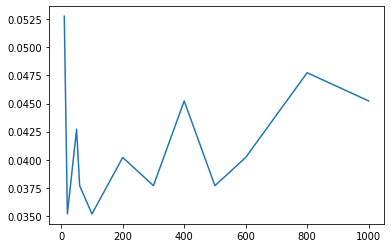

In [30]:
plt.plot(fe,1-oob)

In [31]:
oob

array([0.94723618, 0.96482412, 0.95728643, 0.96231156, 0.96482412,
       0.95979899, 0.96231156, 0.95477387, 0.96231156, 0.95979899,
       0.95226131, 0.95477387])